# Using opencv - advanced image operations

We will explore advanced image operations which can be performed by opencv.

In [1]:
# make sure opencv is installed
! pip install opencv-python --quiet
! pip install matplotlib --quiet
! pip install numpy --quiet

In [2]:
# import the necessary modules
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

# define path constants
INPUT_DIR = "./images/input/"
OUTPUT_DIR = "./images/output/"
INPUT_IMAGE = "UTCN_1991_promotion_after_25_years.png"

In [3]:
# read the image data, forcing color conversion
original_image_data = cv.imread(
    filename = INPUT_DIR + "/" + INPUT_IMAGE, # specification of input file
    flags = cv.IMREAD_COLOR # the image will be read forcing color conversion
)

# triple resizing for up-scaled image version
input_image_data = cv.resize(
    src = original_image_data, # use original image
    dsize = (original_image_data.shape[1] * 3, original_image_data.shape[0] * 3), # scale the image at triple size
    interpolation = cv.INTER_LANCZOS4 # using a specific interpolation techniques
)

In [4]:
# define a function for displaying images
def display_image(image_data, conversion = None, cmap = None):
    
    # set the image size
    fig = plt.figure(frameon= False)
    fig.set_size_inches(image_data.shape[1] / 100,  image_data.shape[0] / 100)
    
    # adjust image data in order to perform data conversion 
    image_data_adjusted = image_data
    if conversion:
        image_data_adjusted = cv.cvtColor(image_data, conversion)

    # display image data
    plt.imshow(
        X = image_data_adjusted,
        cmap = cmap
    )
    
    # hide grid ticks
    plt.xticks([])
    plt.yticks([])
    
    # show the image plot
    plt.show()
    
    return

## Image noising and denoising
OpenCV can add and remove noise to an image. Image noise removal is important in handling low quality images.

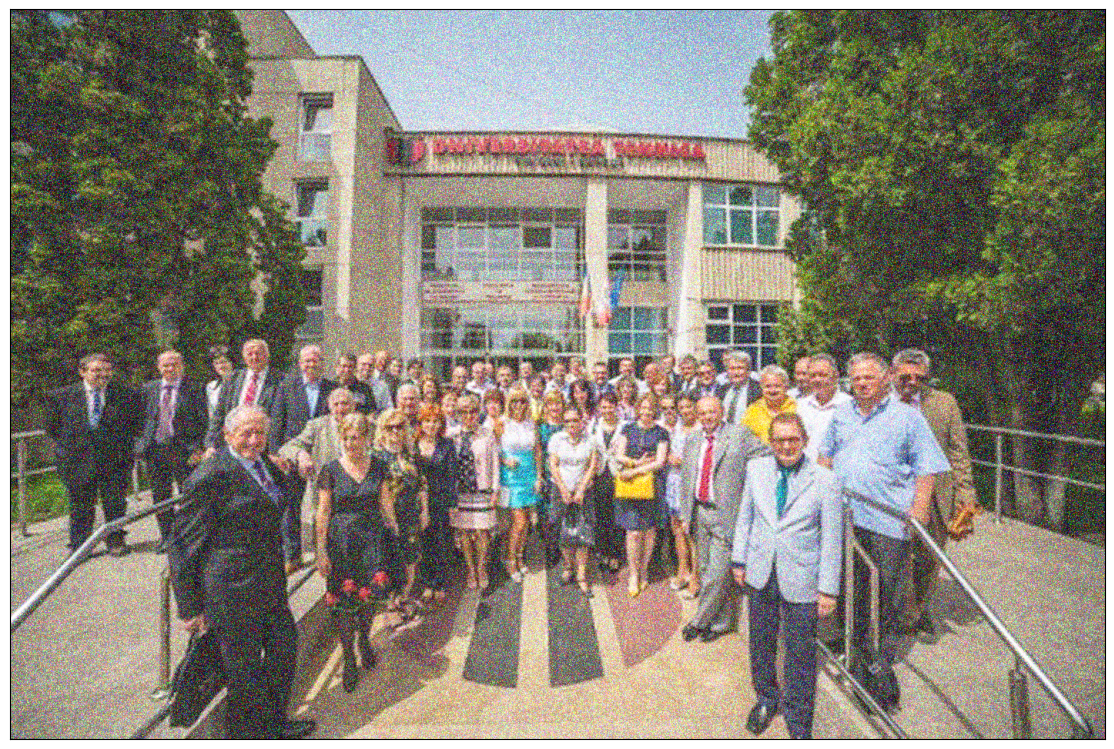

In [5]:
# we will perform image noising

# initialize image nosing data
noise_image_data = np.zeros(input_image_data.shape, np.uint8)
noise_signal_image_data = cv.randn( # using random normal distribution
    noise_image_data, # will be based on the zero-data image
    (32, 32, 32), # the average value
    (64, 64, 64) # the standard variation
)

# add noise to the image
noised_image_data = cv.add(input_image_data, noise_signal_image_data)

# display image data
display_image(
    image_data = noised_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

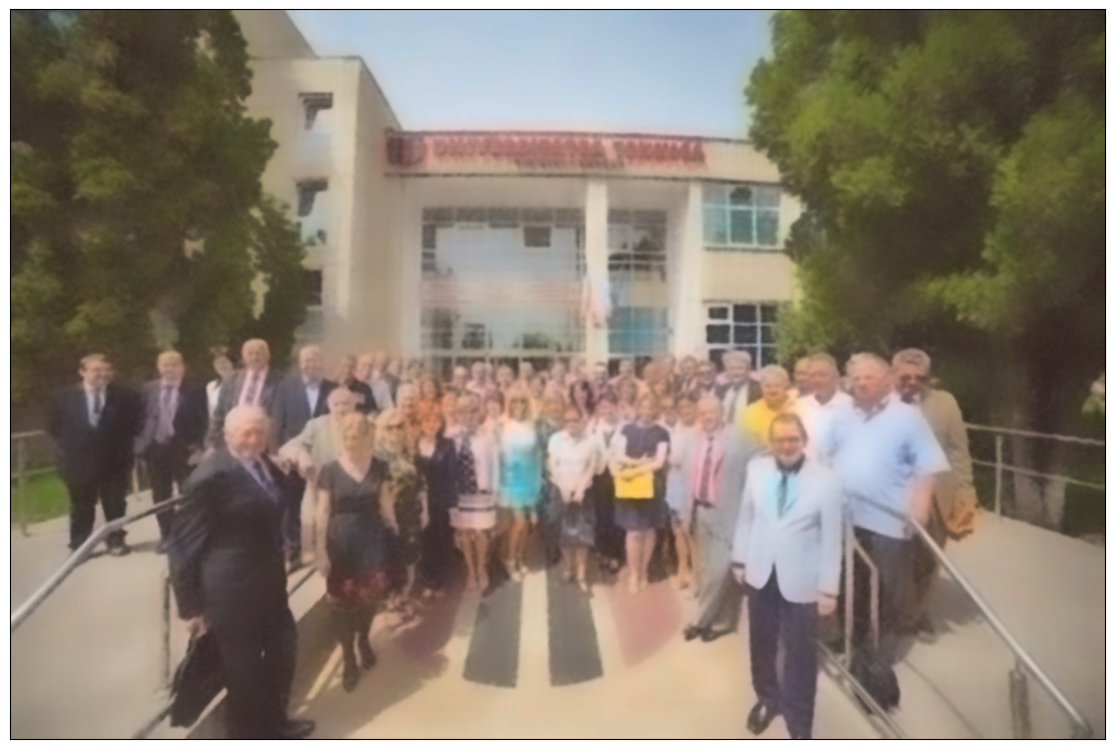

In [6]:
# we will de-noise an input image

# initialize image nosing data
denoised_image_data = cv.fastNlMeansDenoisingColored(
    src = noised_image_data,
    searchWindowSize = 43, # using a larger search window, having better results and lower performance
    h = 32, # using a higher luminance filter, we will lose noise and also image details
    hColor = 72 # using a higher color filter, losing noise and also image details
    
)

# display image data
display_image(
    image_data = denoised_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

## Image blurring and sharpening
OpenCV can add also add blurring to an image allowing unnecessary details to be obscured.

It also can sharpen an image, emphasizing the image edges, contours and luminosity. 

In [7]:
# let's clip a region of interest from the image 
rectangular_area = {
    "x": 0,
    "y": 0,
    "w": input_image_data.shape[1],
    "h": input_image_data.shape[0] // 3
}

clipped_image_data = input_image_data[
    rectangular_area["y"]: rectangular_area["y"] + rectangular_area["h"],
    rectangular_area["x"]: rectangular_area["x"] + rectangular_area["w"]
]

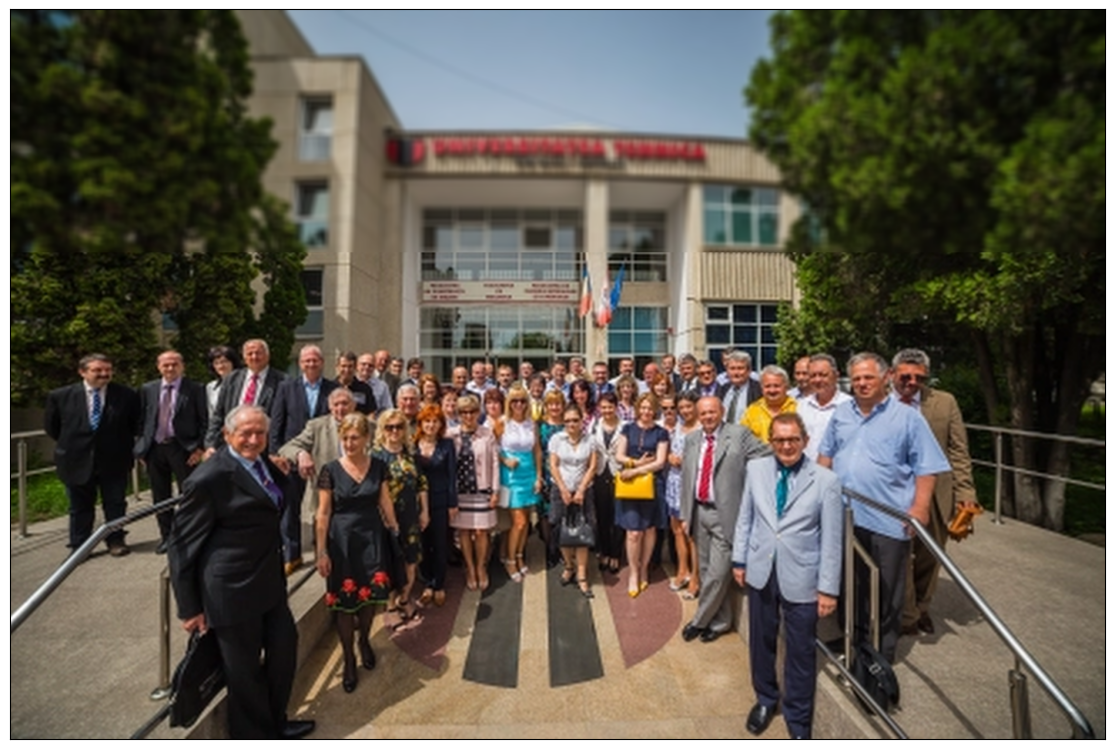

In [8]:
# we will blur the details of a rectangular area from the image

# blur the clipped image
blurred_clipped_image_data = cv.blur(
    src = clipped_image_data,
    ksize = (10, 10), # use a kernel size for moderate level blurring
)

# insert back the blurred image in the original data
blurred_image_data = input_image_data.copy()
blurred_image_data [
    rectangular_area["y"]: rectangular_area["y"] + rectangular_area["h"],
    rectangular_area["x"]: rectangular_area["x"] + rectangular_area["w"]
] = blurred_clipped_image_data

# display image data
display_image(
    image_data = blurred_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

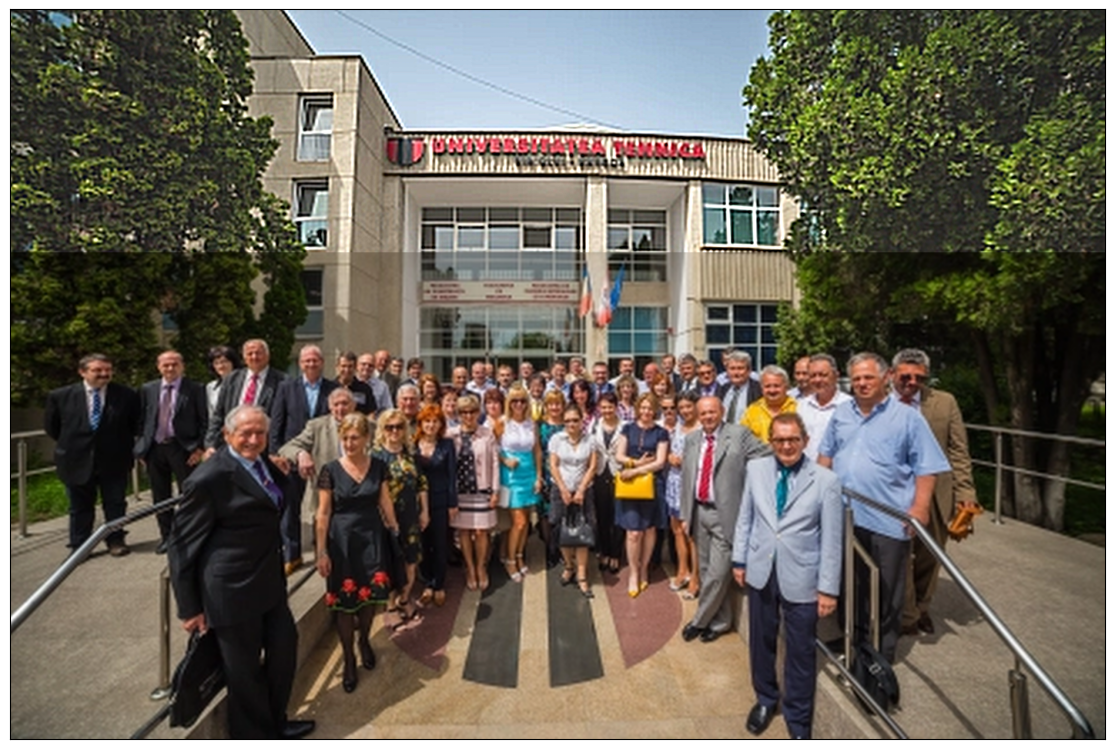

In [9]:
# we will sharpen the details of a rectangular area from the image

# combine the blurred and original clipped images
sharpened_clipped_image_data = cv.addWeighted(
    src1 = clipped_image_data, # the clipped data represents the original data
    src2 = blurred_clipped_image_data, # the blurred image data will be subtracted
    alpha = 3, # weight relevance for original image data
    beta = -2, # weight relevance for blurred image data 
    gamma = 32 # luminosity offset
)

# insert back the blurred image in the original data
sharpened_image_data = input_image_data.copy()
sharpened_image_data [
    rectangular_area["y"]: rectangular_area["y"] + rectangular_area["h"],
    rectangular_area["x"]: rectangular_area["x"] + rectangular_area["w"],
] = sharpened_clipped_image_data

# display image data
display_image(
    image_data = sharpened_image_data, # pass the image data
    conversion = cv.COLOR_BGR2RGB # convert BGR data to RGB data
)

## Image dilation and erosion
Image dilation allows the boundaries of fragments from an image to expand, allowing even creation of connections between image segments. This leads to losing image features as the they may be incorporated into the image feature dilation.

On the other hand, image erosion removes the pixels along the border of an image, causing the segments of an image to even become disconnected. This might increase the image segments or features.

These operations is usually performed on binary images which can be generated by thresholding functions. A thresholding function will preserve the pixels that are above a value, setting the value 1 for them, otherwise will set it to 0. 

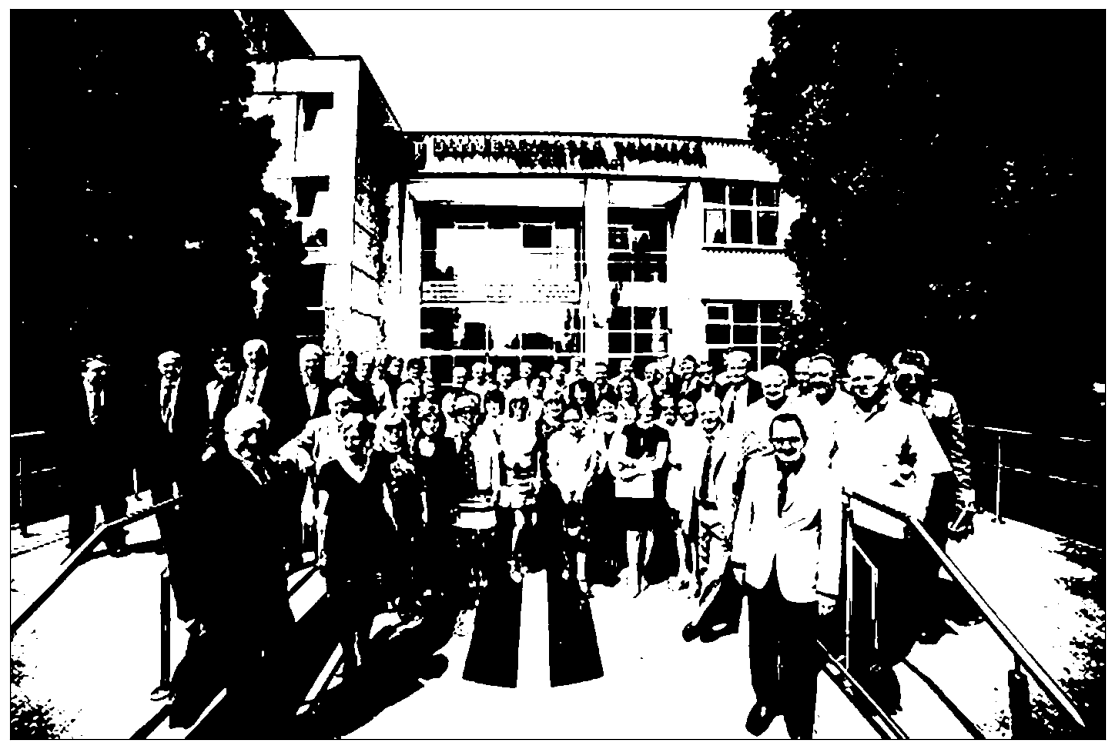

In [10]:
# transform the image to grayscale color
gray_scale_image_data = cv.cvtColor(
    src = input_image_data,
    code = cv.COLOR_BGR2GRAY 
)

# keep only the above average pixels as image pixels
# transforming the image in a binary format (0 and 1 pixels) 
threshold_image = cv.threshold(
    src = gray_scale_image_data,
    thresh = np.mean(gray_scale_image_data) * 1.25, # pixels having a value above a certain threshold will be preserved
    maxval = 255,
    type = cv.THRESH_BINARY
)[1]

# display image data
display_image(
    image_data = threshold_image, # pass the image data
    cmap = "gray"
)

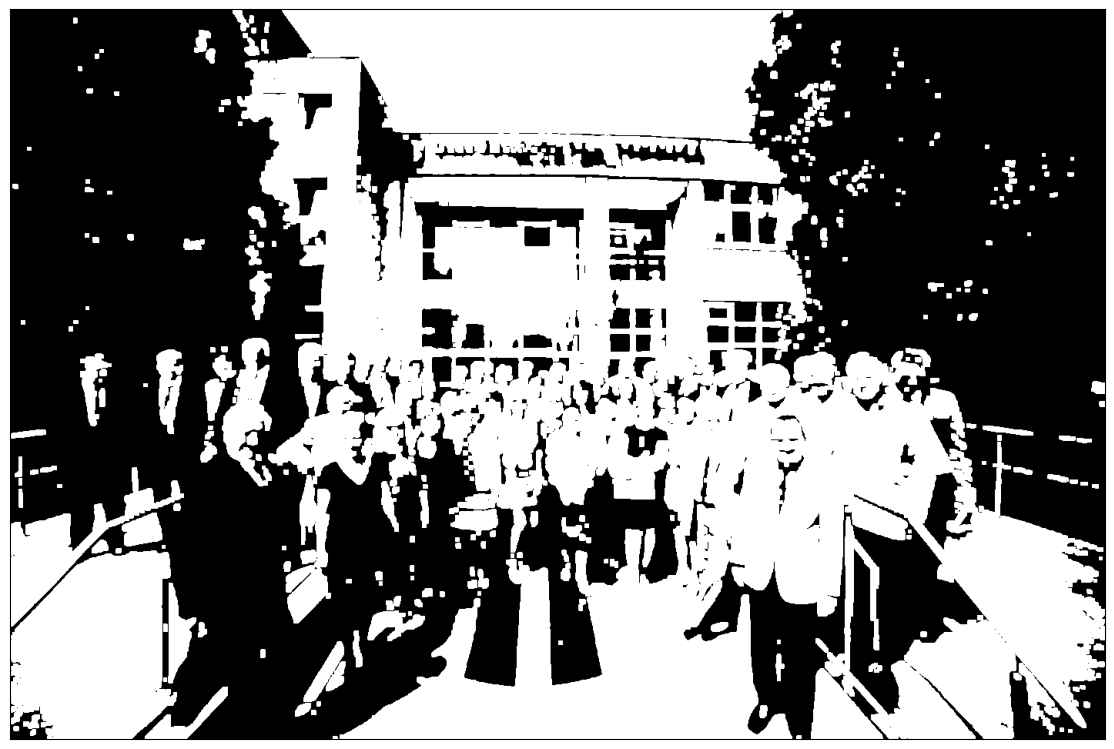

In [11]:
# defining a dilation kernel for image dilation
dilation_kernel = np.ones((5, 5), np.uint8)

dilated_image_data = cv.dilate(
    src = threshold_image,
    kernel = dilation_kernel,
    iterations = 1
)

# display image data
display_image(
    image_data = dilated_image_data, # pass the image data
    cmap = "gray"
) 

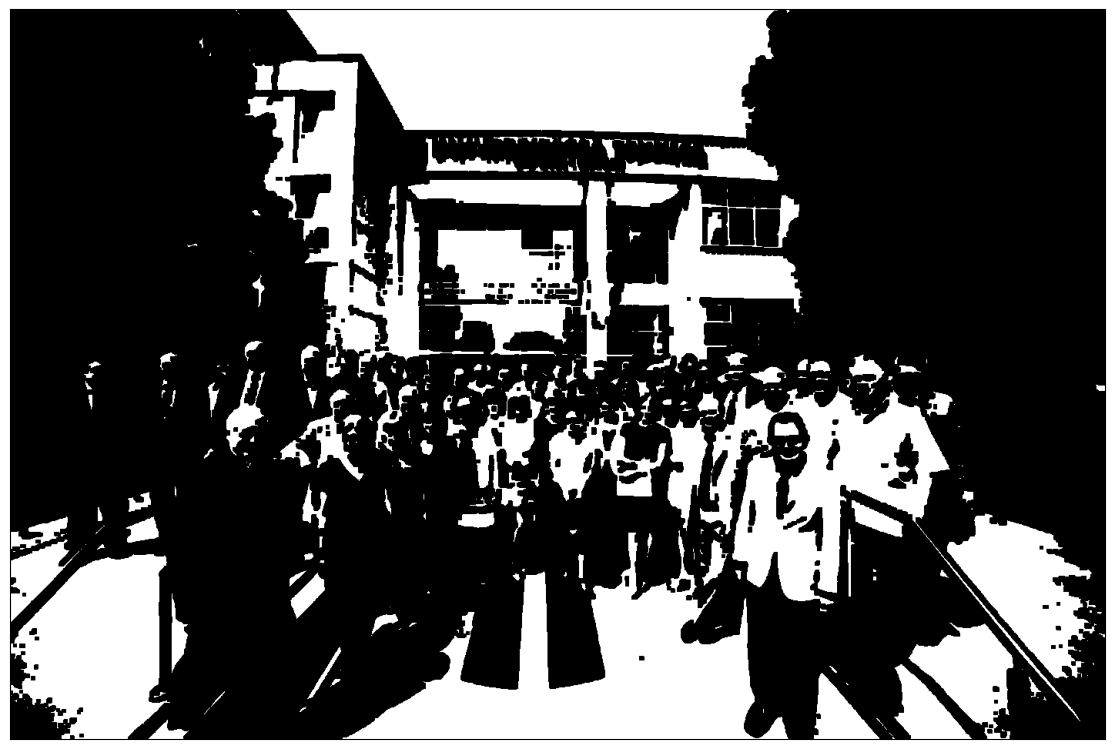

In [12]:
# defining a erosion kernel for image erosion
erosion_kernel = np.ones((5, 5), np.uint8)

erosion_image_data = cv.erode(
    src = threshold_image,
    kernel = erosion_kernel, 
    iterations = 1
)

# display image data
display_image(
    image_data = erosion_image_data, # pass the image data
    cmap = "gray"
) 